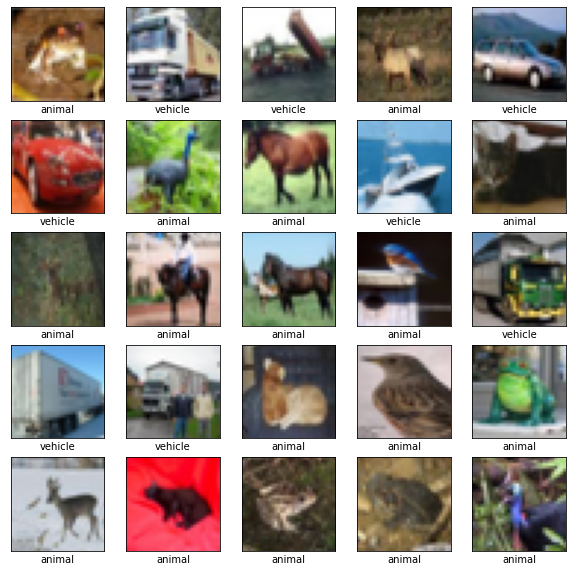

Epoch 1/20
782/782 [==============================] - 17s 9ms/step - loss: 0.3407 - accuracy: 0.8562 - val_loss: 0.3198 - val_accuracy: 0.8611
Epoch 2/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2634 - accuracy: 0.8943 - val_loss: 0.2234 - val_accuracy: 0.9125
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2447 - accuracy: 0.9033 - val_loss: 0.2667 - val_accuracy: 0.8934
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2335 - accuracy: 0.9073 - val_loss: 0.2620 - val_accuracy: 0.8922
Epoch 5/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2258 - accuracy: 0.9107 - val_loss: 0.1982 - val_accuracy: 0.9223
Epoch 6/20
782/782 [==============================] - 8s 11ms/step - loss: 0.2174 - accuracy: 0.9152 - val_loss: 0.2186 - val_accuracy: 0.9133
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2121 - accuracy: 0.9158 - val_loss: 0.2579 - val_accuracy: 0.8949
Epoc

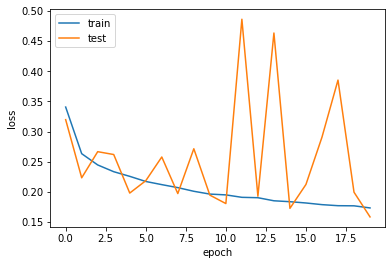

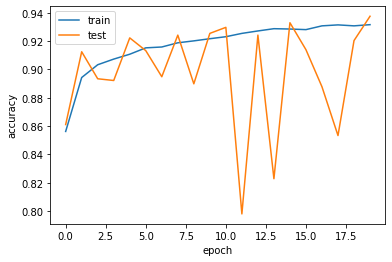

Epoch 1/20
782/782 [==============================] - 8s 10ms/step - loss: 0.3407 - accuracy: 0.8553 - val_loss: 0.3490 - val_accuracy: 0.8485
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2538 - accuracy: 0.8981 - val_loss: 0.2461 - val_accuracy: 0.9024
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2243 - accuracy: 0.9098 - val_loss: 0.1968 - val_accuracy: 0.9227
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2072 - accuracy: 0.9183 - val_loss: 0.2544 - val_accuracy: 0.8998
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.1964 - accuracy: 0.9236 - val_loss: 0.1712 - val_accuracy: 0.9336
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.1853 - accuracy: 0.9280 - val_loss: 0.2014 - val_accuracy: 0.9205
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.1757 - accuracy: 0.9312 - val_loss: 0.1561 - val_accuracy: 0.9393
Epoch

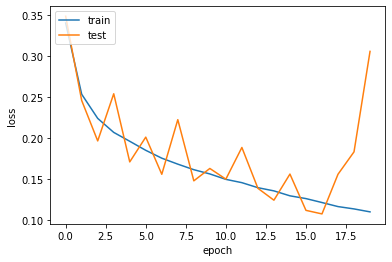

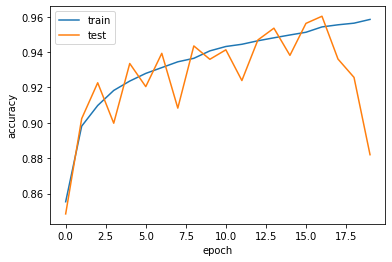

Epoch 1/20
782/782 [==============================] - 9s 10ms/step - loss: 0.3465 - accuracy: 0.8503 - val_loss: 0.2687 - val_accuracy: 0.8904
Epoch 2/20
782/782 [==============================] - 7s 8ms/step - loss: 0.2414 - accuracy: 0.9027 - val_loss: 0.2412 - val_accuracy: 0.9038
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.2110 - accuracy: 0.9156 - val_loss: 0.1743 - val_accuracy: 0.9326
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1914 - accuracy: 0.9248 - val_loss: 0.2593 - val_accuracy: 0.8949
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.1723 - accuracy: 0.9333 - val_loss: 0.1834 - val_accuracy: 0.9291
Epoch 6/20
782/782 [==============================] - 7s 8ms/step - loss: 0.1563 - accuracy: 0.9403 - val_loss: 0.1373 - val_accuracy: 0.9468
Epoch 7/20
782/782 [==============================] - 7s 8ms/step - loss: 0.1426 - accuracy: 0.9446 - val_loss: 0.1169 - val_accuracy: 0.9563
Epoch

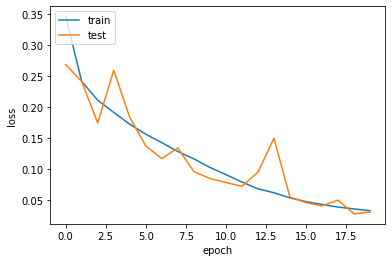

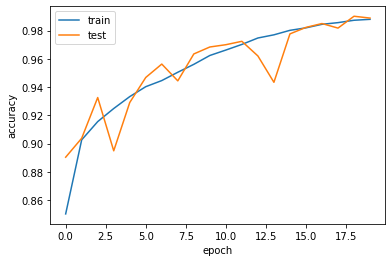

In [ ]:
from matplotlib import pyplot as plt
def showImg(x, y):
  i = 0
  while i < len(x):
    print(y[i])
    plt.imshow(x[i])
    plt.show()
    i += 1

def classifierY(y):
  ytemp = y
  ii = 0
  while ii < len(ytemp):
    if ytemp[ii] == 0 or  ytemp[ii] == 1 or  ytemp[ii] == 8 or  ytemp[ii] == 9: ytemp[ii] = 1
    else: ytemp[ii] = 0
    ii += 1
  return ytemp

def classifierX(x):
  return x.astype('float32')/255.0

from keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


X_train_normalize = classifierX(X_train)
y_train_normalize = classifierY(y_train)

X_test_normalize =  classifierX(X_test)
y_test_normalize =  classifierY(y_test)

class_names = ['animal', 'vehicle']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_normalize[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_normalize[i][0]])
plt.show()

y_train_normalize = to_categorical(y_train_normalize)
y_test_normalize = to_categorical(y_test_normalize)


from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_normalize, y_train_normalize, epochs=20, batch_size=64, validation_data=(X_train_normalize, y_train_normalize))

model.save('miw_s19461_f_1_model_fit.h5'.format(1))

from tensorflow import keras
model = keras.models.load_model('miw_s19461_f_1_model_fit.h5'.format(1))
loss, acc = model.evaluate(X_test_normalize, y_test_normalize, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_normalize, y_train_normalize, epochs=20, batch_size=64, validation_data=(X_train_normalize, y_train_normalize))

model.save('miw_s19461_f_2_model_fit.h5'.format(1))

model = keras.models.load_model('miw_s19461_f_2_model_fit.h5'.format(1))
loss, acc = model.evaluate(X_test_normalize, y_test_normalize, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_normalize, y_train_normalize, epochs=20, batch_size=64, validation_data=(X_train_normalize, y_train_normalize))

model.save('miw_s19461_f_3_model_fit.h5'.format(1))

model = keras.models.load_model('miw_s19461_f_3_model_fit.h5'.format(1))
loss, acc = model.evaluate(X_test_normalize, y_test_normalize, verbose=0)
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()